In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/Suicides in India 2001-2012.csv")

In [ ]:
df.State.unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [ ]:
df[df["State"]=="Karnataka"].Year

108144    2001
108145    2001
108146    2001
108147    2001
108148    2001
108149    2001
108150    2001
108151    2001
108152    2001
108153    2001
108154    2001
108155    2001
108156    2001
108157    2001
108158    2001
108159    2001
108160    2001
108161    2001
108162    2001
108163    2001
108164    2001
108165    2001
108166    2001
108167    2001
108168    2001
108169    2001
108170    2001
108171    2001
108172    2001
108173    2001
108174    2001
108175    2001
108176    2001
108177    2001
108178    2001
108179    2001
108180    2001
108181    2001
108182    2001
108183    2001
108184    2001
108185    2001
108186    2001
108187    2001
108188    2001
108189    2001
108190    2001
108191    2001
108192    2001
108193    2001
108194    2001
108195    2001
108196    2001
108197    2001
108198    2001
108199    2001
108200    2001
108201    2001
108202    2001
108203    2001
108204    2001
108205    2001
108206    2001
108207    2001
108208    2001
108209    2001
108210    

No missing Values

In [ ]:
df1=df

In [ ]:
dfnone = df.loc[df["Total"]==0]

In [ ]:
dfnone["State"].value_counts

<bound method IndexOpsMixin.value_counts of 0         A & N Islands
1         A & N Islands
2         A & N Islands
3         A & N Islands
4         A & N Islands
              ...      
237504      West Bengal
237505      West Bengal
237506      West Bengal
237507      West Bengal
237508      West Bengal
Name: State, Length: 135481, dtype: object>

In [ ]:
df1["State"].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [ ]:
df1["Age_group"].unique()

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

In [ ]:
a=['Total (All India)','Total (States)','Total (Uts)']
b=['0-100+']
df1 = df1[~df1['State'].isin(a)]
df1 = df1[~df1['Age_group'].isin(b)]


In [ ]:
df_ta2= df1.groupby(["Type_code","Type"]).sum()
df6 = df_ta2.reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x="Type",y="Total",hue="Type_code",data=df6)
plt.xticks(rotation=90)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225663 entries, 0 to 237508
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      225663 non-null  object
 1   Year       225663 non-null  int64 
 2   Type_code  225663 non-null  object
 3   Type       225663 non-null  object
 4   Gender     225663 non-null  object
 5   Age_group  225663 non-null  object
 6   Total      225663 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 13.8+ MB


Suicide rate over the years

In [ ]:
dfy = df1.groupby(["Year"]).sum().reset_index()

In [ ]:
dfy['normalized_total_suicide'] = (dfy['Total'] /
                  dfy['Total'].sum())

In [ ]:
dfy.columns

Index(['Year', 'Total', 'normalized_total_suicide'], dtype='object')

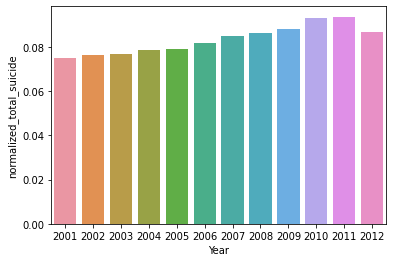

In [ ]:
sns.barplot(x="Year",y="normalized_total_suicide",data=dfy)

Suicide rate shows an increase over the years from 2001 to 2012

In [ ]:
#suicide rate over the state

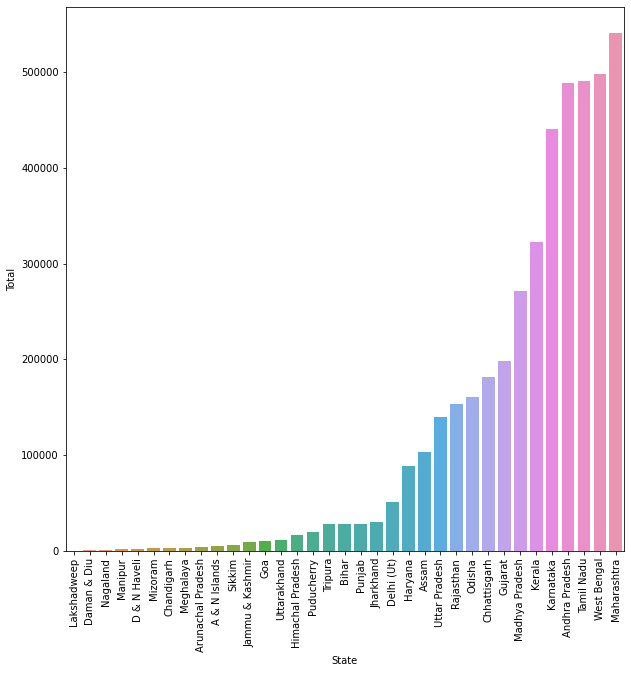

In [ ]:
dfs = df1.groupby(["State"]).sum().reset_index()
#dfs['percent'] = (dfs['Total']/dfs['Total'].sum()) * 100
plt.figure(figsize=(10,10))
sns.barplot(x="State",y="Total",data=dfs,order=dfs.sort_values('Total').State)
plt.xticks(rotation=90)
dfs.drop(["Year"],axis=1,inplace=True)

In [ ]:
dfs.rename(columns={"Total":"stotal"},inplace=True)
#stotal: Total suicide across individual state from 2001 to 2012

In [ ]:
dfs.columns

Index(['State', 'stotal'], dtype='object')

In [ ]:
dfs

,State,stotal
0,A & N Islands,4863
1,Andhra Pradesh,488419
2,Arunachal Pradesh,3977
3,Assam,103338
4,Bihar,27724
5,Chandigarh,3096
6,Chhattisgarh,181364
7,D & N Haveli,2058
8,Daman & Diu,833
9,Delhi (Ut),50558


In [ ]:
li=[s for s in dfs.sort_values('stotal',ascending=False).State[:7]]
li

['Maharashtra',
 'West Bengal',
 'Tamil Nadu',
 'Andhra Pradesh',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh']

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

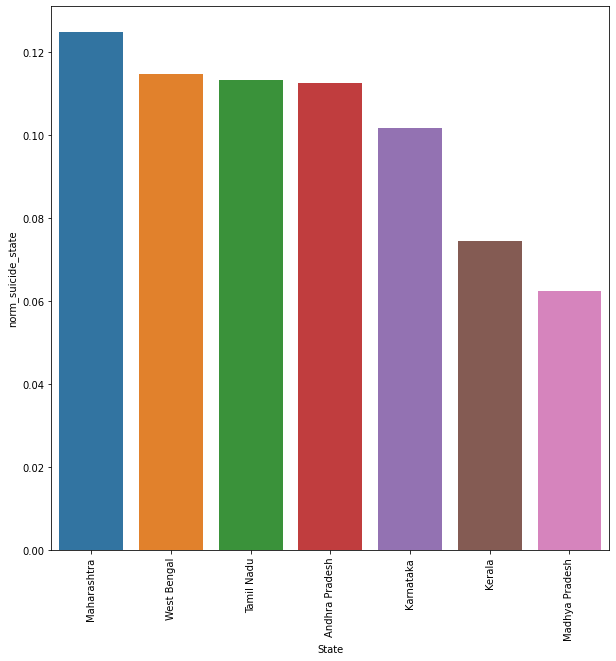

In [ ]:
plt.figure(figsize=(10,10))
dfs['norm_suicide_state'] = (dfs['stotal']/dfs['stotal'].sum())
sns.barplot(x="State",y="norm_suicide_state",data=dfs,order=dfs.sort_values('norm_suicide_state',ascending=False).State[:7])
plt.xticks(rotation=90)


In [ ]:
dfs.columns

Index(['State', 'stotal', 'norm_suicide_state'], dtype='object')

In [ ]:
dfs.State.unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

Maharastra has the highest suicide number while Lakshwadeep has the lowest.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text major ticklabel objects>)

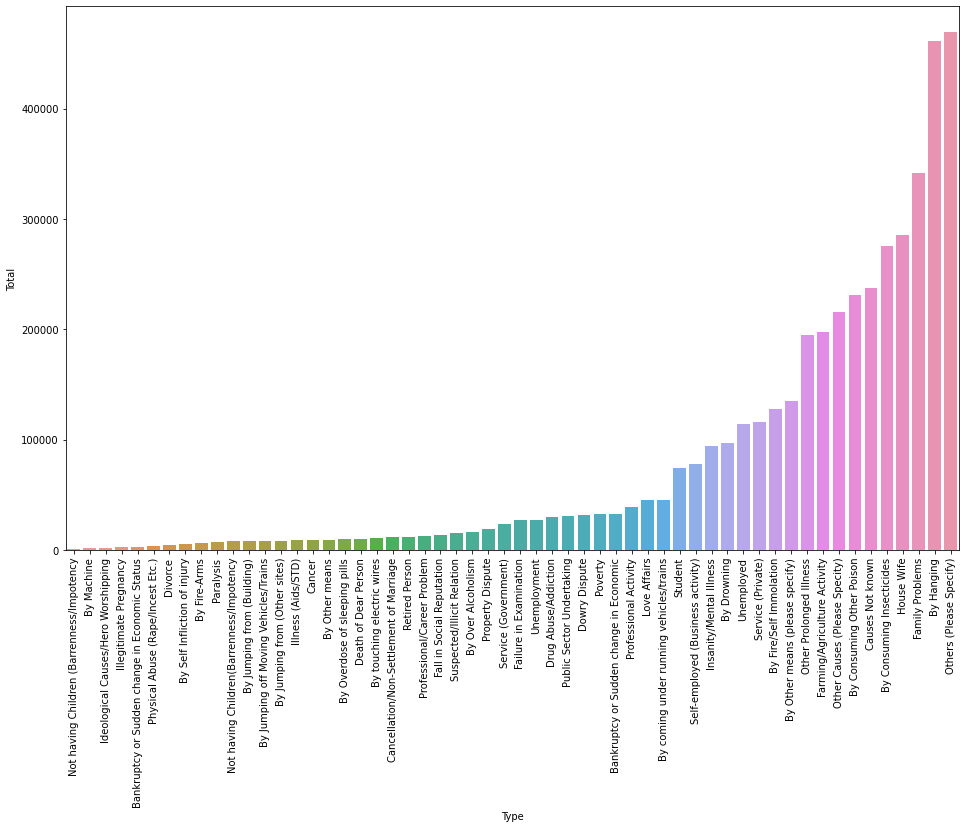

In [ ]:
dft = df1.groupby(["Type"]).sum().reset_index()
dft['percent'] = (dft['Total']/dft['Total'].sum()) * 100
plt.figure(figsize=(16,10))
sns.barplot(x="Type",y="Total",data=dft,order=dft.sort_values('Total').Type)
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

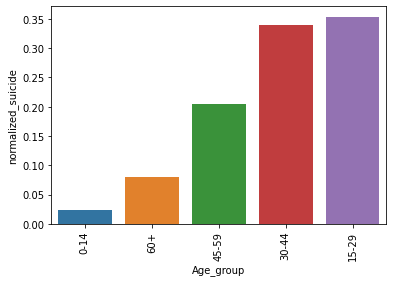

In [ ]:
dfage = df1.groupby(["Age_group"]).sum().reset_index()
dfage['normalized_suicide'] = (dfage['Total']/dfage['Total'].sum())
#plt.figure(figsize=(20,10))
sns.barplot(x="Age_group",y="normalized_suicide",data=dfage,order=dfage.sort_values('normalized_suicide').Age_group)
plt.xticks(rotation=90)

people belonging to age group of 30-60 are showing high suicidal rate

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

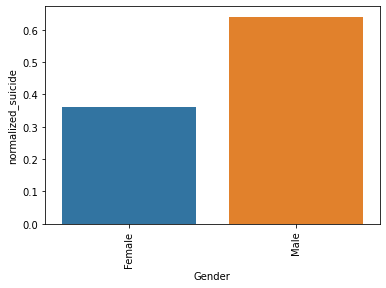

In [ ]:
dfg = df1.groupby(["Gender"]).sum().reset_index()
dfg['normalized_suicide'] = (dfg['Total']/dfg['Total'].sum())
#plt.figure(figsize=(16,10))
sns.barplot(x="Gender",y="normalized_suicide",data=dfg,order=dfg.sort_values('normalized_suicide').Gender)
plt.xticks(rotation=90)


In [ ]:
df_yr= df1.groupby(["State","Year"]).sum()

In [ ]:
dfyr =df_yr


In [ ]:
dfyr.reset_index(inplace=True)
dfyr[dfyr["State"]=="Sikkim"]

,State,Year,Total
348,Sikkim,2001,282
349,Sikkim,2002,227
350,Sikkim,2003,315
351,Sikkim,2004,292
352,Sikkim,2005,327
353,Sikkim,2006,435
354,Sikkim,2007,366
355,Sikkim,2008,861
356,Sikkim,2009,722
357,Sikkim,2010,840


In [ ]:
df3 = df_yr.reset_index()

In [ ]:
df3.columns

Index(['index', 'State', 'Year', 'Total'], dtype='object')

In [ ]:
dfsm=dfs.drop(["norm_suicide_state"],axis=1)
mergedStuff = pd.merge(dfsm, df3, on=['State'], how='inner')

mergedStuff['normalized_suicide_yearwise'] = (mergedStuff['Total']/ mergedStuff['stotal'])
mergedStuff
dfsy = mergedStuff[mergedStuff['State'].isin(li)]
dfsy
# #dfsy['norm'] = (dfsy['Total']/dfsy['Total'].sum())



,State,stotal,index,Year,Total,normalized_suicide_yearwise
12,Andhra Pradesh,488419,12,2001,31566,0.064629
13,Andhra Pradesh,488419,13,2002,35079,0.071822
14,Andhra Pradesh,488419,14,2003,34227,0.070077
15,Andhra Pradesh,488419,15,2004,40578,0.083080
16,Andhra Pradesh,488419,16,2005,40326,0.082564
...,...,...,...,...,...,...
415,West Bengal,497962,415,2008,44556,0.089477
416,West Bengal,497962,416,2009,43944,0.088248
417,West Bengal,497962,417,2010,48111,0.096616
418,West Bengal,497962,418,2011,49476,0.099357


In [ ]:
df[df["State"]=="Karnataka"].Year

108144    2001
108145    2001
108146    2001
108147    2001
108148    2001
          ... 
114931    2012
114932    2012
114933    2012
114934    2012
114935    2012
Name: Year, Length: 6792, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

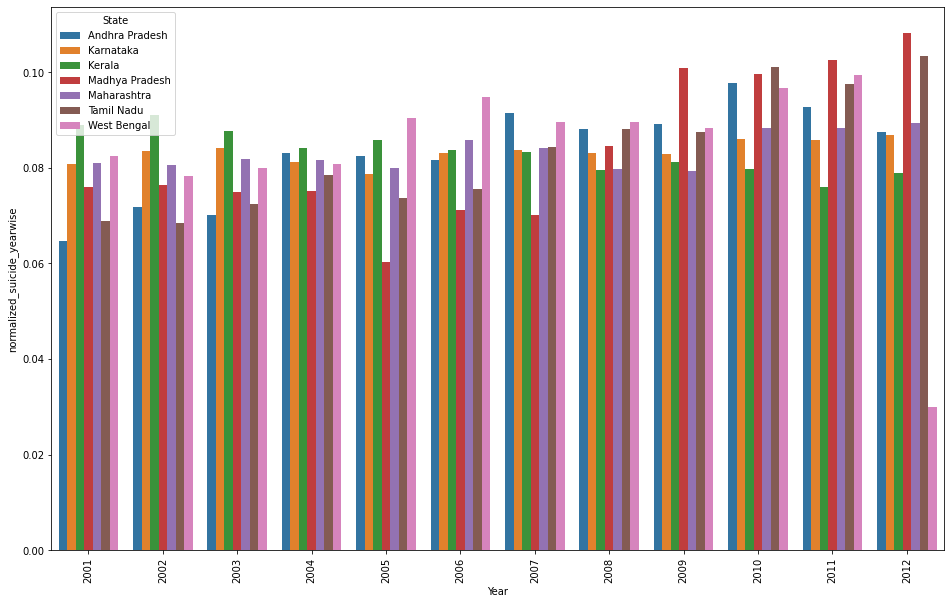

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(x="Year",y="normalized_suicide_yearwise",hue="State",data=dfsy)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text major ticklabel objects>)

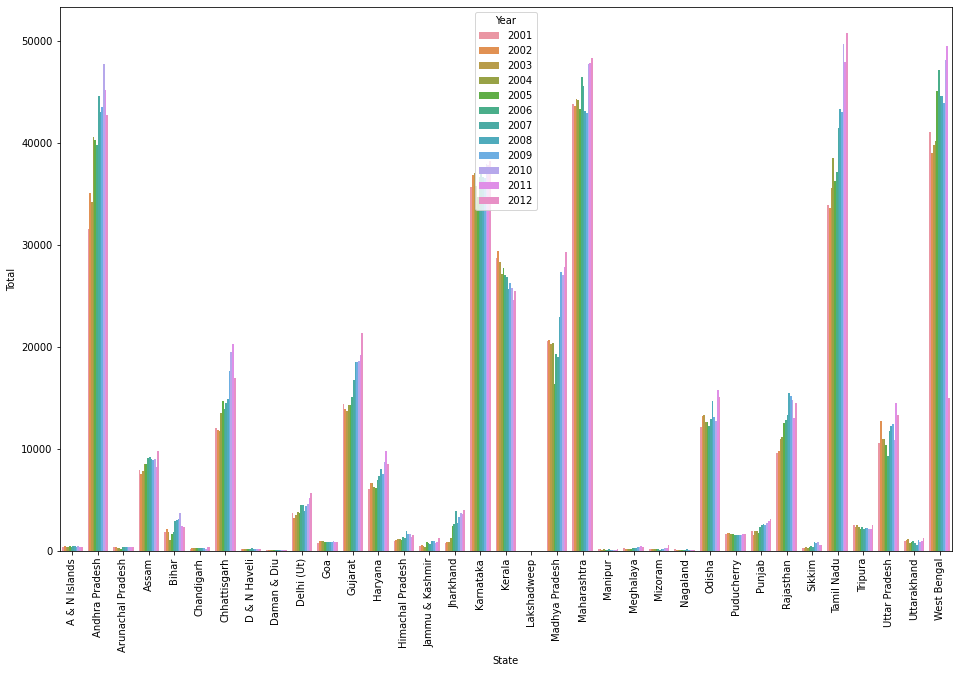

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(x="State",y="Total",hue="Year",data=df3)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text major ticklabel objects>)

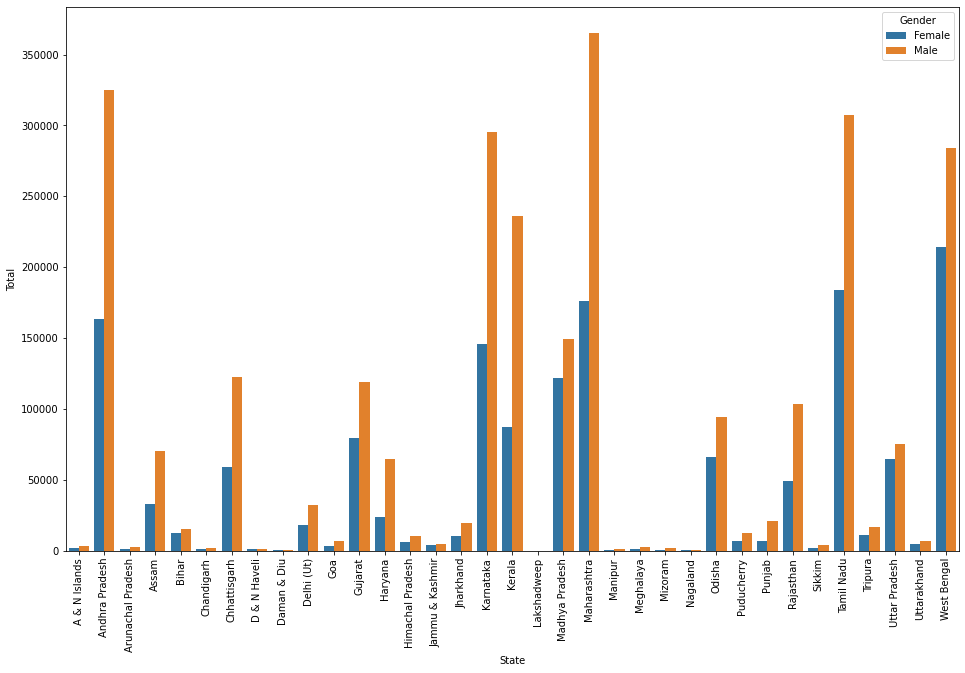

In [ ]:
df_g= df1.groupby(["State","Gender"]).sum()
df4 = df_g.reset_index()
plt.figure(figsize=(16,10))
sns.barplot(x="State",y="Total",hue="Gender",data=df4)
plt.xticks(rotation=90)

In [ ]:
df4.columns

Index(['State', 'Gender', 'Year', 'Total'], dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text major ticklabel objects>)

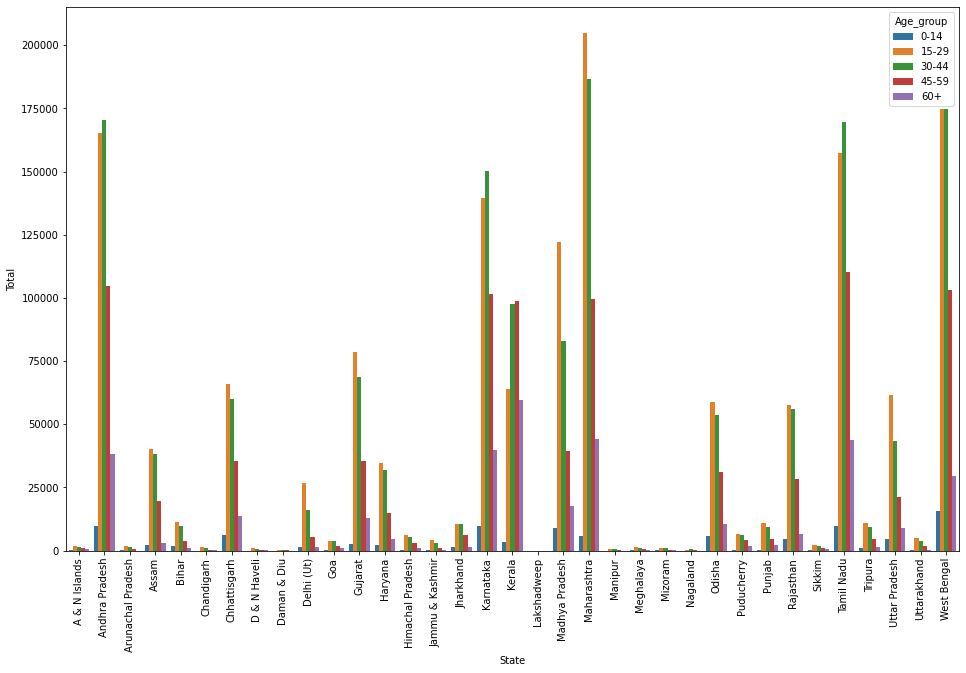

In [ ]:
df_a= df1.groupby(["State","Age_group"]).sum()
df5 = df_a.reset_index()
plt.figure(figsize=(16,10))
sns.barplot(x="State",y="Total",hue="Age_group",data=df5)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text major ticklabel objects>)

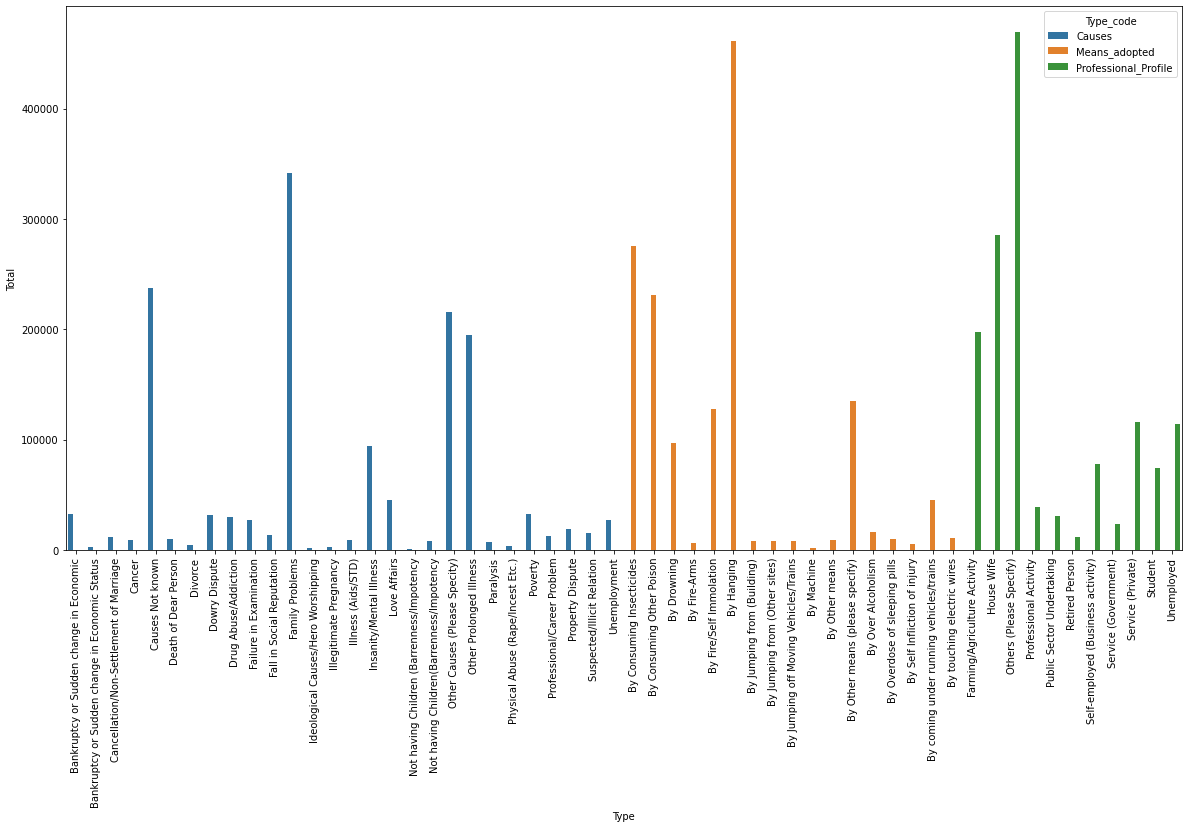

In [ ]:
df_ta2= df1.groupby(["Type_code","Type"]).sum()
df6 = df_ta2.reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x="Type",y="Total",hue="Type_code",data=df6)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text major ticklabel objects>)

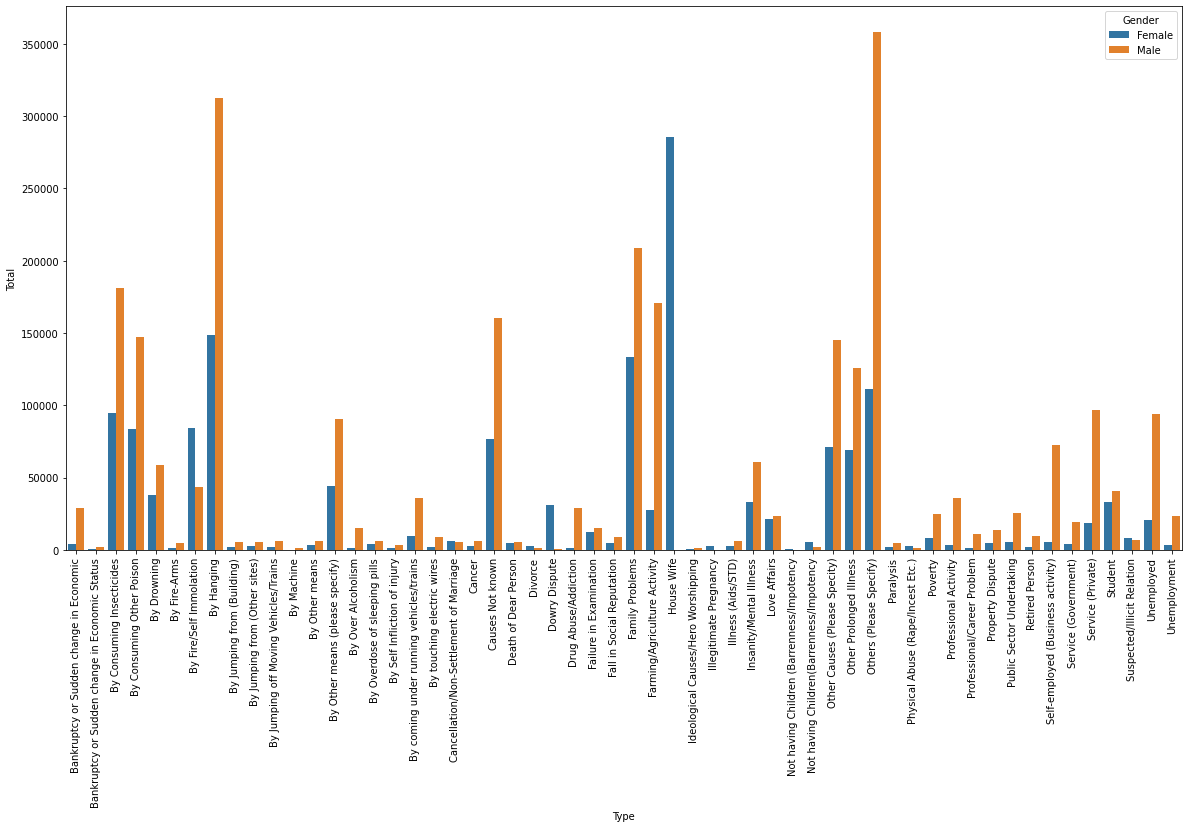

In [ ]:
df_ta= df1.groupby(["Type","Gender"]).sum()
df6 = df_ta.reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x="Type",y="Total",hue="Gender",data=df6)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

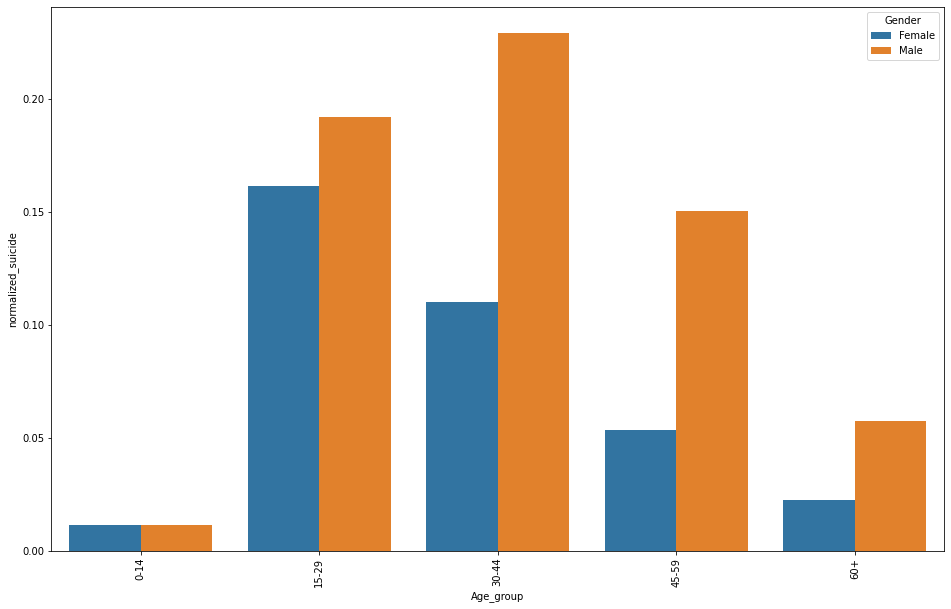

In [ ]:
df_ga= df1.groupby(["Gender","Age_group"]).sum()
df7 = df_ga.reset_index()
df7["normalized_suicide"]=df7["Total"]/df7["Total"].sum()
plt.figure(figsize=(16,10))
sns.barplot(x="Age_group",y="normalized_suicide",hue="Gender",data=df7)
plt.xticks(rotation=90)

In [ ]:
dfnew = df1

In [ ]:
dfcen = pd.read_csv("/content/census.csv")

In [ ]:
dfcen.head()

,State,Population,Increase,Area,Density,Sex-ratio,Literacy
0,Uttar Pradesh,199812341.0,20.23%,"2,40,928",829,912,67.68
1,Maharashtra,112374333.0,15.99%,"3,07,713",365,929,82.34
2,Bihar,104099452.0,25.42%,"94,163","1,106",918,61.80
3,West Bengal,91276115.0,13.84%,"88,752","1,028",950,76.26
4,Andhra Pradesh,84580777.0,10.98%,"2,75,045",308,993,67.02


In [ ]:
dfcent =dfcen.drop(["Increase","Area","Density"],axis=1)

In [ ]:
dfcent.dropna(inplace=True
              )

In [ ]:
y = [2012]
dfnew = dfnew[~dfnew["Year"].isin(y)]

In [ ]:
dfpop = pd.merge(dfs, dfcent, on=['State'], how='inner')

# dfpop['normalized_suicide_yearwise'] = (dfpop['Total']/ dfpop['stotal'])
dfpop

,State,stotal,norm_suicide_state,Population,Sex-ratio,Literacy
0,Andhra Pradesh,488419,0.112639,84580777.0,993,67.02
1,Arunachal Pradesh,3977,0.000917,1383727.0,938,65.38
2,Assam,103338,0.023832,31205576.0,958,72.19
3,Bihar,27724,0.006394,104099452.0,918,61.80
4,Chandigarh,3096,0.000714,1055450.0,818,86.05
5,Chhattisgarh,181364,0.041826,25545198.0,991,70.28
6,Goa,10413,0.002401,1458545.0,973,88.70
7,Gujarat,198504,0.045779,60439692.0,919,78.03
8,Haryana,88302,0.020364,25351462.0,879,75.55
9,Himachal Pradesh,15924,0.003672,6864602.0,972,82.80


In [ ]:
dfs['State'].isin(dfcent['State'])

0     False
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8     False
9     False
10     True
11     True
12     True
13     True
14    False
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25    False
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
Name: State, dtype: bool

In [ ]:
dfs["State"]

0         A & N Islands
1        Andhra Pradesh
2     Arunachal Pradesh
3                 Assam
4                 Bihar
5            Chandigarh
6          Chhattisgarh
7          D & N Haveli
8           Daman & Diu
9            Delhi (Ut)
10                  Goa
11              Gujarat
12              Haryana
13     Himachal Pradesh
14      Jammu & Kashmir
15            Jharkhand
16            Karnataka
17               Kerala
18          Lakshadweep
19       Madhya Pradesh
20          Maharashtra
21              Manipur
22            Meghalaya
23              Mizoram
24             Nagaland
25               Odisha
26           Puducherry
27               Punjab
28            Rajasthan
29               Sikkim
30           Tamil Nadu
31              Tripura
32        Uttar Pradesh
33          Uttarakhand
34          West Bengal
Name: State, dtype: object

In [ ]:
dfcent["State"]

0                   Uttar Pradesh
1                     Maharashtra
2                           Bihar
3                     West Bengal
4                  Andhra Pradesh
5                  Madhya Pradesh
6                      Tamil Nadu
7                       Rajasthan
8                       Karnataka
9                         Gujarat
10                         Orissa
11                         Kerala
12                      Jharkhand
13                          Assam
14                         Punjab
15                   Chhattisgarh
16                        Haryana
17                          Delhi
18              Jammu and Kashmir
19                    Uttarakhand
20               Himachal Pradesh
21                        Tripura
22                      Meghalaya
23                        Manipur
24                       Nagaland
25                            Goa
26              Arunachal Pradesh
27                     Puducherry
28                        Mizoram
29            

In [ ]:
dfcent["State"]=dfcent["State"].replace(["Andaman and Nicobar Islands","Dadra and Nagar Haveli","Daman and Diu","Delhi","Jammu and Kashmir","Orissa"],["A & N Islands","D & N Haveli","Daman & Diu","Delhi (Ut)","Jammu & Kashmir","Odisha"])

In [ ]:
dfpop = pd.merge(dfs, dfcent, on=['State'], how='inner')

dfpop['normal'] = (dfpop['stotal']/ dfpop['Population'])
dfpop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               35 non-null     object 
 1   stotal              35 non-null     int64  
 2   norm_suicide_state  35 non-null     float64
 3   Population          35 non-null     float64
 4   Sex-ratio           35 non-null     int64  
 5   Literacy            35 non-null     float64
 6   normal              35 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 2.2+ KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text major ticklabel objects>)

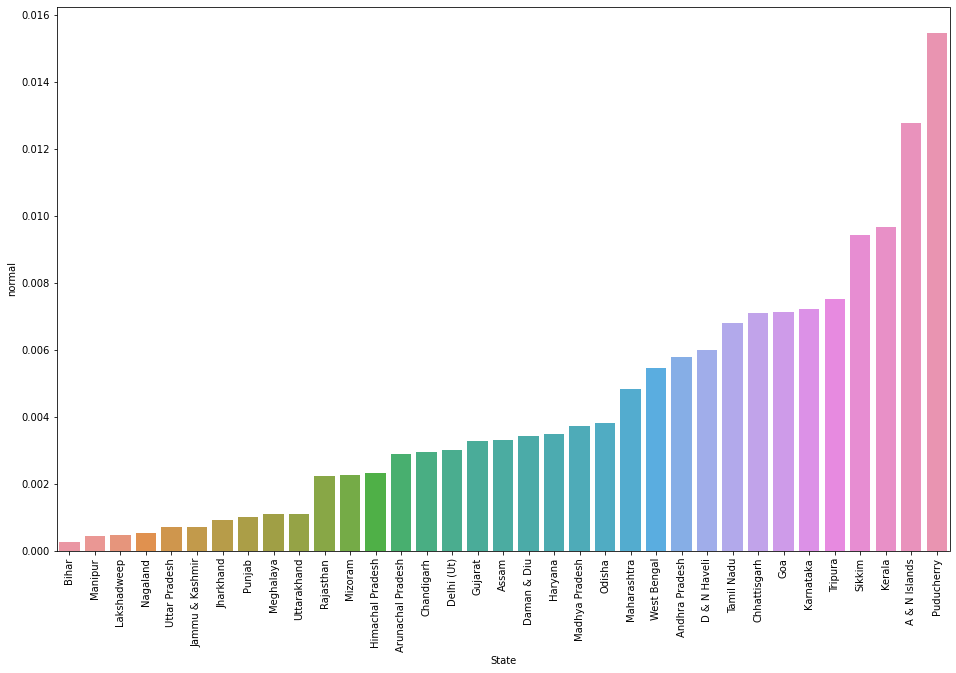

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(x="State",y="normal",data=dfpop,order=dfpop.sort_values("normal").State)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

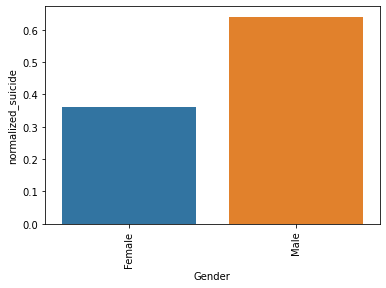

In [ ]:
dfg = df1.groupby(["Gender"]).sum().reset_index()
dfg['normalized_suicide'] = (dfg['Total']/dfg['Total'].sum())
#plt.figure(figsize=(16,10))
sns.barplot(x="Gender",y="normalized_suicide",data=dfg,order=dfg.sort_values('normalized_suicide').Gender)
plt.xticks(rotation=90)


In [ ]:
dfpop1 = pd.merge(dfpop,df4,on='State', how='inner')

dfpop1.drop(["Year"],axis=1)
dfpop1.to_csv('out.csv', index=False)

In [ ]:
dfgen = pd.read_csv("//content/GenderCen - Sheet1.csv")

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
dfgen['State'].isin(dfpop1['State'])

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
49    True
50    True
51    True
52    True
53    True
54    True
55    True
56    True
57    True
58    True
59    True
60    True
61    True
62    True
63    True
64    True
65    True
66    True
67    True
68    True
69    True
Name: State, dtype: bool

In [ ]:
dfgen

,State,Population,GPopulation,Gender
0,A & N Islands,380581.0,202871.0,Male
1,A & N Islands,380581.0,177710.0,Female
2,Andhra Pradesh,84580777.0,42442146.0,Male
3,Andhra Pradesh,84580777.0,42138631.0,Female
4,Arunachal Pradesh,1383727.0,713912.0,Male
5,Arunachal Pradesh,1383727.0,669815.0,Female
6,Assam,31205576.0,15939443.0,Male
7,Assam,31205576.0,15266133.0,Female
8,Bihar,104099452.0,54278157.0,Male
9,Bihar,104099452.0,49821295.0,Female


In [ ]:
dfpop1.drop(["Population","norm_suicide_state"],axis=1,inplace=True)

In [ ]:
dfmer = pd.merge(dfpop1,dfgen,how='inner',left_on=['State','Gender'],right_on=['State','Gender'])

In [ ]:
dfmer.head()

,State,stotal,Sex-ratio,Literacy,normal,Gender,Year,Total,Population,GPopulation
0,A & N Islands,4863,876,86.63,0.012778,Female,6398738,1650,380581.0,177710.0
1,A & N Islands,4863,876,86.63,0.012778,Male,6442880,3213,380581.0,202871.0
2,Andhra Pradesh,488419,993,67.02,0.005775,Female,6499052,163147,84580777.0,42138631.0
3,Andhra Pradesh,488419,993,67.02,0.005775,Male,6501060,325272,84580777.0,42442146.0
4,Arunachal Pradesh,3977,938,65.38,0.002874,Female,6410802,1172,1383727.0,669815.0


In [ ]:
dfmer.drop(["Year"],axis=1,inplace=True)

In [ ]:
dfmer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        70 non-null     object 
 1   stotal       70 non-null     int64  
 2   Sex-ratio    70 non-null     int64  
 3   Literacy     70 non-null     float64
 4   normal       70 non-null     float64
 5   Gender       70 non-null     object 
 6   Total        70 non-null     int64  
 7   Population   70 non-null     float64
 8   GPopulation  70 non-null     float64
dtypes: float64(4), int64(3), object(2)
memory usage: 5.5+ KB


In [ ]:
dfmer["Gender_normal"] = dfmer["Total"]/dfmer["GPopulation"]

In [ ]:
dfmer.head()

,State,stotal,Sex-ratio,Literacy,normal,Gender,Total,Population,GPopulation,Gender_normal
0,A & N Islands,4863,876,86.63,0.012778,Female,1650,380581.0,177710.0,0.009285
1,A & N Islands,4863,876,86.63,0.012778,Male,3213,380581.0,202871.0,0.015838
2,Andhra Pradesh,488419,993,67.02,0.005775,Female,163147,84580777.0,42138631.0,0.003872
3,Andhra Pradesh,488419,993,67.02,0.005775,Male,325272,84580777.0,42442146.0,0.007664
4,Arunachal Pradesh,3977,938,65.38,0.002874,Female,1172,1383727.0,669815.0,0.001750


REQUIREMENT 3

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text major ticklabel objects>)

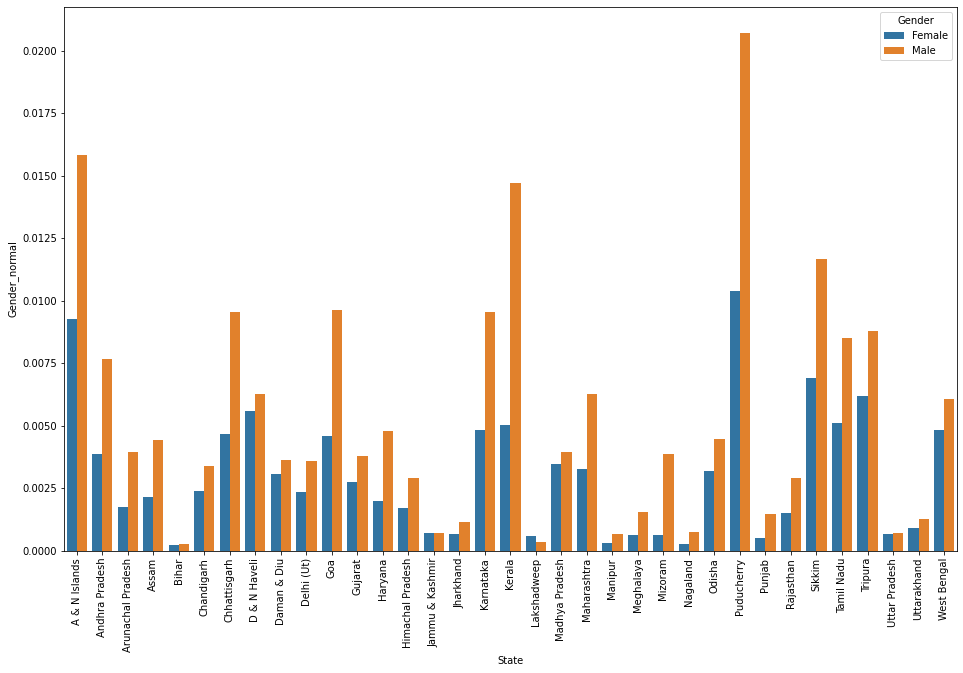

In [ ]:
# dfgen1= dfpop1.groupby(["State","Gender"]).sum()
# dfgen2 = dfgen1.reset_index()
plt.figure(figsize=(16,10))
sns.barplot(x="State",y="Gender_normal",hue="Gender",data=dfmer)
plt.xticks(rotation=90)

REQUIREMENT 1

In [ ]:
dfmer["State_normal"] = dfmer["stotal"]/dfmer["Population"]
dfmer.drop("normal",axis=1,inplace=True)
dfstate=dfmer[["State_normal","State"]]
dfstate.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text major ticklabel objects>)

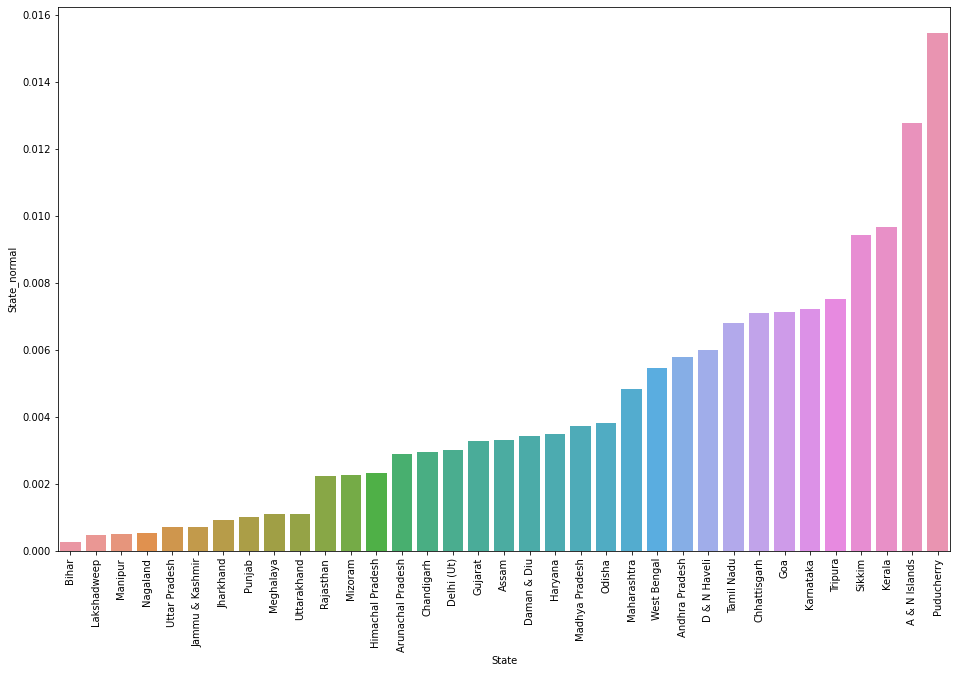

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(x="State",y="State_normal",data=dfstate,order=dfstate.sort_values("State_normal").State)
plt.xticks(rotation=90)

In [ ]:
li1=[s for s in dfstate.sort_values('State_normal',ascending=False).State[:7]]
li1

['Puducherry',
 'A & N Islands',
 'Kerala',
 'Sikkim',
 'Tripura',
 'Karnataka',
 'Goa']

RREQUIREMENT 2

In [ ]:
dfmer

,State,stotal,Sex-ratio,Literacy,Gender,Total,Population,GPopulation,Gender_normal,State_normal
0,A & N Islands,4863,876,86.63,Female,1650,380581.0,177710.0,0.009285,0.012778
1,A & N Islands,4863,876,86.63,Male,3213,380581.0,202871.0,0.015838,0.012778
2,Andhra Pradesh,488419,993,67.02,Female,163147,84580777.0,42138631.0,0.003872,0.005775
3,Andhra Pradesh,488419,993,67.02,Male,325272,84580777.0,42442146.0,0.007664,0.005775
4,Arunachal Pradesh,3977,938,65.38,Female,1172,1383727.0,669815.0,0.001750,0.002874
5,Arunachal Pradesh,3977,938,65.38,Male,2805,1383727.0,713912.0,0.003929,0.002874
6,Assam,103338,958,72.19,Female,33062,31205576.0,15266133.0,0.002166,0.003312
7,Assam,103338,958,72.19,Male,70276,31205576.0,15939443.0,0.004409,0.003312
8,Bihar,27724,918,61.80,Female,12148,104099452.0,49821295.0,0.000244,0.000266
9,Bihar,27724,918,61.80,Male,15576,104099452.0,54278157.0,0.000287,0.000266


In [ ]:
dfmer.to_csv("NormalPopulation.csv")

In [ ]:
dfsy = mergedStuff[mergedStuff['State'].isin(li1)]

In [ ]:
dfsy2 =dfmer[["State","Population"]]

In [ ]:
dfstateyear = pd.merge(dfsy,dfsy2,on="State",how="inner")
dfstateyear.drop_duplicates(inplace=True)
dfstateyear["State_normal"]=dfstateyear["Total"]/dfstateyear["Population"]

In [ ]:
dfstateyear.columns


Index(['State', 'stotal', 'index', 'Year', 'Total',
       'normalized_suicide_yearwise', 'Population', 'State_normal'],
      dtype='object')

In [ ]:
dfstateyear

,State,stotal,index,Year,Total,normalized_suicide_yearwise,Population,State_normal
0,A & N Islands,4863,0,2001,387,0.079581,380581.0,0.001017
2,A & N Islands,4863,1,2002,432,0.088834,380581.0,0.001135
4,A & N Islands,4863,2,2003,339,0.069710,380581.0,0.000891
6,A & N Islands,4863,3,2004,366,0.075262,380581.0,0.000962
8,A & N Islands,4863,4,2005,417,0.085750,380581.0,0.001096
10,A & N Islands,4863,5,2006,399,0.082048,380581.0,0.001048
12,A & N Islands,4863,6,2007,463,0.095209,380581.0,0.001217
14,A & N Islands,4863,7,2008,428,0.088012,380581.0,0.001125
16,A & N Islands,4863,8,2009,393,0.080814,380581.0,0.001033
18,A & N Islands,4863,9,2010,468,0.096237,380581.0,0.001230


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

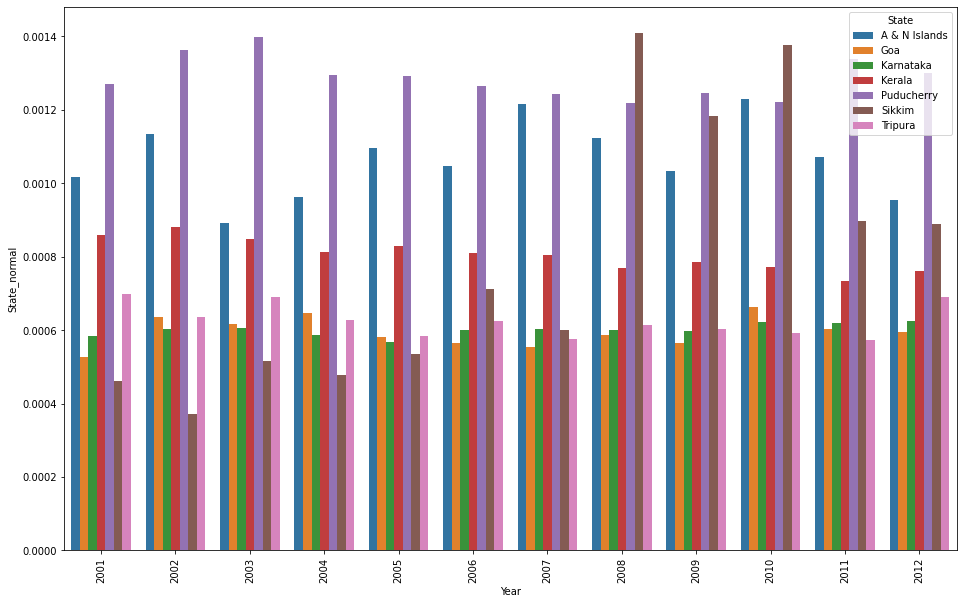

In [ ]:
#year wise suicide normalized against total population of the state
plt.figure(figsize=(16,10))
sns.barplot(x="Year",y="State_normal",hue="State",data=dfstateyear)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

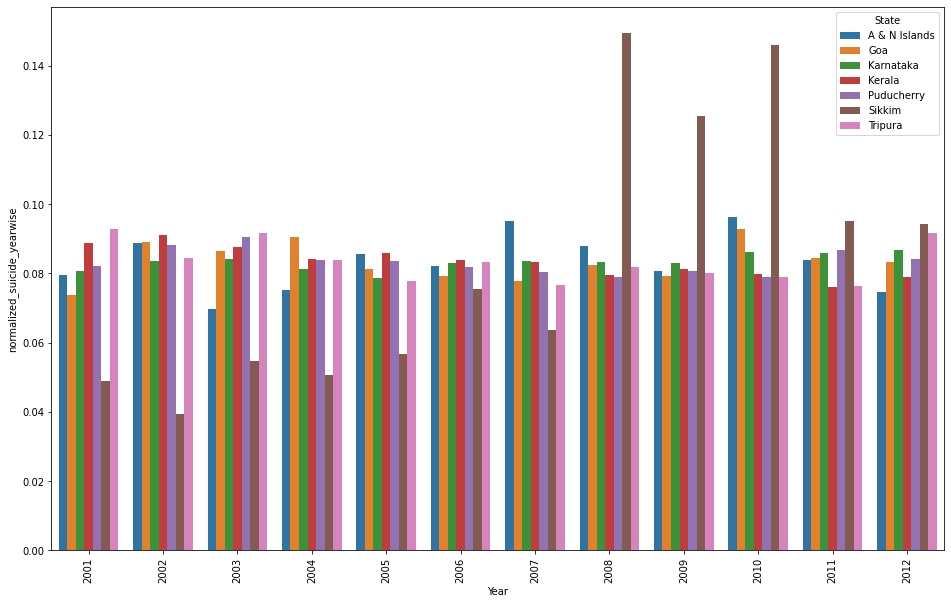

In [ ]:
#year wise suicide normalized against total suicide in the state
plt.figure(figsize=(16,10))
sns.barplot(x="Year",y="normalized_suicide_yearwise",hue="State",data=dfstateyear)
plt.xticks(rotation=90)

In [ ]:
dfgdp = pd.read_csv("/content/NormalPopulationGDP - NormalPopulation.csv")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text major ticklabel objects>)

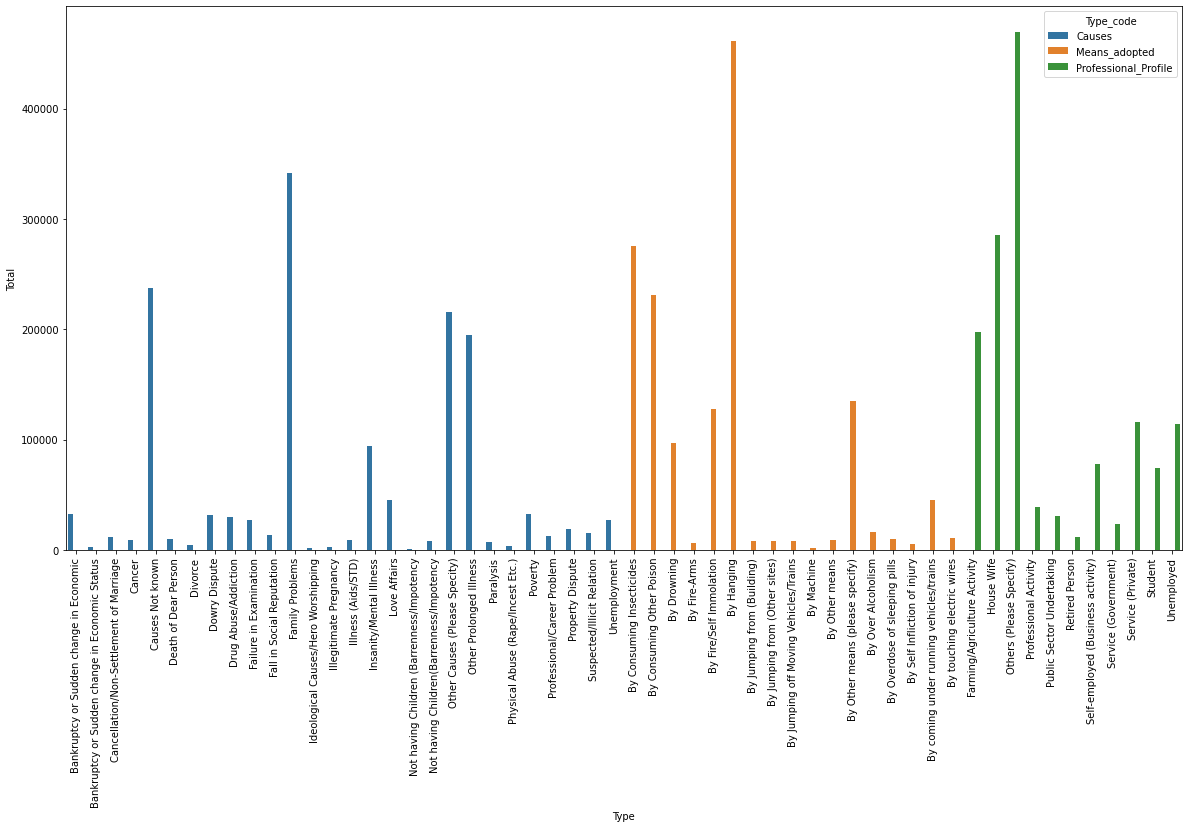

In [ ]:
df_ta2= df1.groupby(["Type_code","Type"]).sum()
df6 = df_ta2.reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x="Type",y="Total",hue="Type_code",data=df6)
plt.xticks(rotation=90)

In [ ]:
df1.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [ ]:
dffam = df1[df1["Type_code"]=="Causes"]

In [ ]:
dffam.groupby(["State","Type"]).sum()
dffam1 = dffam.reset_index()

In [ ]:
dffam1

In [ ]:
# plt.figure(figsize=(20,10))
# sns.barplot(x=dffam.index,hue="Type",y="Total",data=dffam)
# plt.xticks(rotation=90)

OBSERVATIONS:



1. There are no missing values in the data. The data is analysed on state and region basis, therefore the rows having Total (All India)', 'Total (States)', 'Total (Uts)' in the state column are dropped as the data for individual state and UTs are already present. The age group 0-100+ is also another category that is considering all the age groups, although data for different age groups within that range is already recorded, hence the rows having this value is also dropped.
2. Over the years from 2001 to 2012 there is an increase in the number of suicide cases
3. Maharashtra has the highest number of suicide cases with numbers higher than 5 lacs followed by Andhra Pradesh and Karnataka both of which have more than 4 lacs cases from 2001 to 2012.
4. Means adopted through which highest number of people have committed suicide is by hanging followed by the method of consumption of insecticides or other poisons
5. Most suicide cases are due to family problems, most others do not have a specified reason behind the act, thirdly many people commit suicide in case diagonised with prolonged illness.
6. Age groups from 15 to 44 committed the highest number of suicides from 2001 to 2012
7. Suicides among male is higher than female from 2001 to 2012. Male population is showing higher number in suicides across all regions and age groups.



